In [347]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [348]:
df=pd.read_csv("Social_Network_Ads.csv")

In [349]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [350]:
x=df.iloc[:,2:4].values

In [351]:
x.shape

(400, 2)

In [352]:
y=df.iloc[:,-1].values

In [353]:
y.shape

(400,)

In [354]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [355]:
x_train.shape

(320, 2)

# standerd scaling

In [356]:
from sklearn.preprocessing import StandardScaler

In [357]:
scaler=StandardScaler()

In [358]:
x_train=scaler.fit_transform(x_train)

In [359]:
x_test=scaler.transform(x_test)

## find the value of K
### 1st method

In [360]:
np.sqrt(x_train.shape[0])

17.88854381999832

In [361]:
from sklearn.neighbors import KNeighborsClassifier


In [373]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [374]:
y_pred=knn.predict(x_test)

C:\Users\ABDUL REHMAN G\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [375]:
y_pred.shape

(80,)

In [376]:
from sklearn.metrics import  r2_score,confusion_matrix,accuracy_score

In [377]:
accuracy_score(y_test,y_pred)

0.9375

In [378]:
confusion_matrix(y_test,y_pred)

array([[50,  4],
       [ 1, 25]], dtype=int64)

In [379]:
# calculate trial and error method
accuracy=[]
for i in range (1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(x_test)))

C:\Users\ABDUL REHMAN G\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ABDUL REHMAN G\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

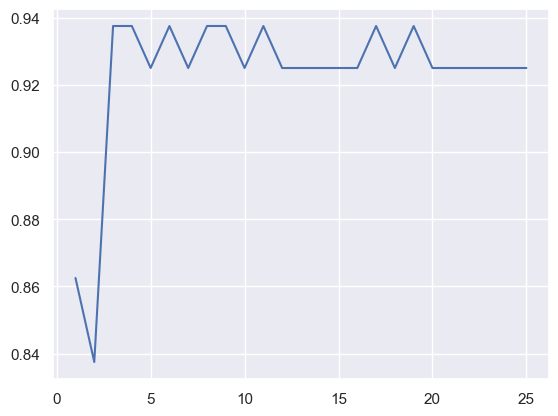

In [380]:
plt.plot(range(1,26),accuracy)

In [371]:
def predic_output():
    age=int(input("Enter the age"))
    salary=int(input("Enter the salary"))
    x_new=np.array([[age],[salary]]).reshape(1,2)
    x_new=scaler.transform(x_new)
    
    if knn.predict(x_new)[0]==1:
        return "will not purchase"
    else:
        return "will purchase"

In [372]:
predic_output()

Enter the age45
Enter the salary56000


C:\Users\ABDUL REHMAN G\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


'will purchase'

# few observations

### step:2 craeting a meshgrid

In [384]:
a=np.arange(start= x_train[:,0].min()-1,stop=x_train[:,0].max()+1,step=0.01)
b=np.arange(start= x_train[:,1].min()-1,stop=x_train[:,1].max()+1,step=0.01)


In [385]:
xx,yy=np.meshgrid(a,b)

In [386]:
yy.shape

(592, 605)

### step3: classify every point on the meshgrid

In [393]:
input_array=np.array([xx.ravel(),yy.ravel()]).T
labels=knn.predict(input_array)

C:\Users\ABDUL REHMAN G\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [394]:
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### step4: plotting the array as an image

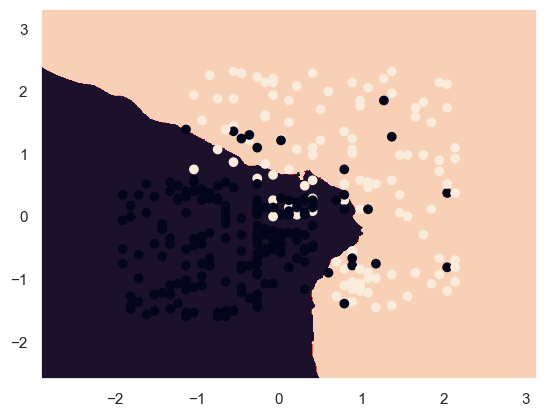

In [403]:
plt.contourf(xx,yy,labels.reshape(xx.shape))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)